# Modeling Democratic Backsliding

Jochen Fromm, 2022

One of the most pressing political issue of our time is the rise of authoritarian populism and democratic backsliding in democratic societies (Norris & Inglehard, 2019). Authoritarian rulers, strongmen and self-proclaimed saviors destroy democracies (Ben-Ghiat, 2020) while populism is on the rise (Müller, 2016). David Waldner and Ellen Lust (2018) argue that "despite a rich and diverse literature, we lack readily available theories to explain backsliding. So how do democracies backslide into authoritarian regimes? Robinson and Acemoglu argue in their book "Economic Origins of Dictatorship and Democracy" (2012) that different social groups prefer different political institutions because of the way they allocate political power and obtain resources. This aspect alone results in interesting dynamics:

In an (aspiring) **autocracy** demagogues, corrupt oligarchs and wannabe autocrats who care only about their clan, tribe or family and who are involved in shady or corrupt business deals have clearly an incentive to weaken political institutions and freedom of speech to remain in power, because they have to fear independent courts, investigative journalism and free elections. Once an autocracy has been established, people living in it have a strong incentive to avoid cricizing the autocratic ruler and his family (or in totalitarian systems his party) if they do not want to be imprisoned or killed. Sarah Kendzior argued this can also happened in a democratic country like the USA (Kendzior, 2020).

Democrats in a **democracy** have an incentive to strengthen institutions to remain in power because independent courts, freedom of speech and free elections enable them to obtain power in democratic elections in the first place. Stronger political institutions in turn lead to less power for those who are not democrats. People in a democracy have as democratic citizens an incentive to raise their voice to criticize the government. Criminals and conmen have an incentive to remain silent to avoid persecution. 

Therefore autocracy and democracy are like two fix points where the system returns to a stable state after any pertubation. In evolutionary game theory which has been for more than 40 years (John Maynard Smith, 1982) two fix points can be found in the stag-hunt game or the coordination game, and we can use the well-known replicator equations for these games to model the transition between an autocracy and a democracy. Normally the system returns to a stable democracy, but if the system is pertubed and a certain tipping point is crossed, then the system moves inevitably towards an autocracy (and vice versa).

### README: How to run the notebook
```
# Install Python and create Anaconda environment
conda create -n matplotlib -y "python=3.7"
conda activate matplotlib

# Install Python packages
pip install pandas numpy jupyter matplotlib

# Install Jupyter kernel for Anaconda environment
python -m ipykernel install --sys-prefix --name=matplotlib

# Run the notebook
jupyter notebook
```


### Import the libraries

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

### Evolutionary Games and their Payoff Matrix

Each game has a specific Payoff Matrix

Hawk-Dove: cost for injury is "c", resource value is "v" 
```
General     Hawk Dove         Coordination 
  a b      (v-c)/2 v   -1 2      1 0         
  c d        0    v/2   0 1      0 2        
```
Prisoner's Dilemma: temptation payoff t, cooperation reward r, punishment p, sucker s where t > r > p > s
```
Stag Hunt  Prisoner's Dilema
  4 1       r s   3 1   
  3 2       t p   4 2
```

In [2]:
# 2 strategy coordination game payoff matrix
games = {
    'coordination_asymmetric_1': [1,0,0,2],
    'coordination_asymmetric_2': [2,0,0,1],
    'coordination_symmetric': [2,0,0,2],
    'hawk_dove_v2_c3': [-0.5,2,0,1],
    'hawk_dove_v2_c4': [-1,2,0,1],
    'hawk_dove_v2_c5': [-1.5,2,0,1],
    'stag_hunt': [4,-1,3,0],
    'prisoners_dilemma': [3,1,4,2],
}

# Mixed Nash Equilibrium according to John Maynard Smith (1982)
def nash(name):
    a,b,c,d = games[name]
    if (b - d + c - a) == 0:
        return -1, -1
    nash_x = (b - d) / (b - d + c - a)
    nash_y = 1-nash_x
    return nash_x, nash_y


### Define Replicator Equation

In [3]:
def g(name,x,y):
   payoff = games[name]
   z = (payoff[0]*x*x + payoff[2]*x*y + payoff[1]*x*y + payoff[3]*y*y)
   vx = x*((payoff[0]*x + payoff[1]*y) - z)
   vy = y*((payoff[2]*x + payoff[3]*y) - z)
   return vx, vy

### Plot the evolutionary

Define helper functions

In [4]:
def plot_payoff_matrix(ax, name):
  a,b,c,d = games[name]
  ax.text(0.4, 0.9, f"Payoff Matrix:", fontsize=10)
  ax.text(0.72, 0.92, f"{a} {b}", fontsize=10)
  ax.text(0.72, 0.87, f"{c} {d}", fontsize=10)
    
def plot_nash_equilibrium(ax, name):
  nash_x, nash_y = nash(name)
  ax.plot(nash_x, nash_y, 'o', color='green') 
  nash_equilibrium = f"{'{:.2f}'.format(nash_x)}, {'{:.2f}'.format(nash_y)}"
  ax.text(0.4, 0.78, f"Nash equilibrium: {nash_equilibrium}", fontsize=10)

Visualize the vector field of the replicator equation for coordination games which have slight different parameters

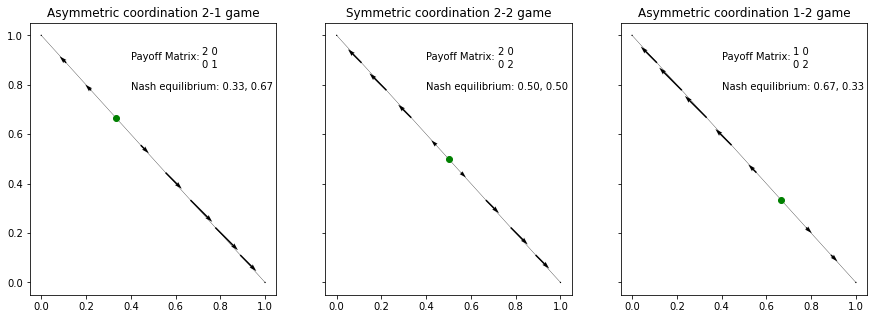

In [5]:
n = 10
X = np.linspace(0, 1, n)
Y = np.array([(1-value) for value in X])
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

names = {
    'coordination_asymmetric_2': "Asymmetric coordination 2-1", 
    'coordination_symmetric': "Symmetric coordination 2-2",
    'coordination_asymmetric_1': "Asymmetric coordination 1-2"
}
keys = list(names.keys())
for i in range(len(keys)):
    name = keys[i]
    U, V = g(name, X, Y)
    ax[i].quiver(X, Y, U, V, width=0.006)
    ax[i].plot([0,1.0], [1.0,0.0], color='black', linewidth=0.3)
    ax[i].set_title(f"{names[name]} game", fontsize=12)
    plot_nash_equilibrium(ax[i], name)
    plot_payoff_matrix(ax[i], name)

For a symmetric coordination game or the stag hunt game the mixed Nash equilibrium is in the middle. 
Both have similar dynamics - two fixed points, and one instable equilibrium between. As Brian Skyrms (2012) 
as argued, these kind of games can be applied to model cooperation and the evolution of social structure.

If the reward for not deviating from the majority increases dramatically (or alternatively the 
punishment for a strategy that deviates from the majority), then the equilibrium shifts accordingly.

The idea is that we can model this democratic erosion by shifting the instable fixpoint
in a coordination game model, which represents the equilibrium between
those who cooperate to support autocracy and those who support democracy.


### Transitions from one fix point to the other


Bermeo (2016) argues that democratic backsliding happens in different ways – coups d’état,
election-day vote fraud, and in recent years in slightly more sophisticated forms 
suchs as promissory coups, executive aggrandizement, and strategic manipulation of 
elections.

Although coups take place by definition suddenly and violenty, and can certainly be seen
as the climax of democratic backsliding, the process of democratic erosion begin slowly 
and can take a long time. Democratic erosion is necessary for coups to be successful because
it eliminates judicial safeguards and critical media.

Therefore Levitsky & Ziblatt (2018) propose a three stage model of the democratic backsliding: 
attacking referees (esp. the judicial system), targeting opponents (political
opponents, critical media outlets), and changing the rules of the game
(changing constitutions, legislative bodies and electoral systems 
to consolidate power).

In [6]:
def f(name, x):
    result = g(name,x,1-x)
    return result[0]

# calculates the trajectory of the state according to
# the replicator equation of the game.
# x is the start value for state
# m is the initial momentum which is used to pertubate the state
# steps is a list which defines the number of iterations
# name is the name of the game
def trajectory(x, m, steps, name):
  values = []
  sign = m
  for step in steps:
    m = m + f(name, x)
    if (sign > 0) and (m < 0): m = 0
    if (sign < 0) and (m > 0): m = 0

    x = x + (f(name,x) + m)*1/10
    if x < 0: x = 0
    if x > 1: x = 1 
    values.append(x)
  return values

If a major part of the population supports democracy and it is well established and well protected by stable institutions like independent parliaments and courts, then the systems returns after an pertubation towards autocracy to a stable state (for instance the United States Capitol attack on Jan 6 2021 by Trump supporters). If the magnitude of the unrest is high enough and the system is in a general crises, then it is possible to cross a tipping point towards an authoritarian regime.

Once an authoritarian regime is firmaly establised, a major part of the population will support the autocracy by silent agreement (i.e. by avoiding criticism of the autocratic ruler) if the autocracy persecutes dissidents with the full power of the state. If such a system is disturbed by anti-government protests, then the system returns after a short pertubation to a stable state (for example the Arabic Spring uprisings).

Text(0.5, 0.98, 'Transition Democracy - Autocracy')

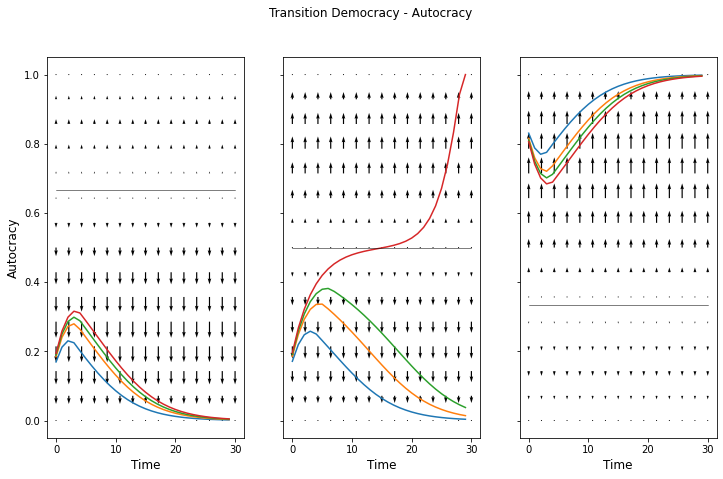

In [7]:
steps = range(30)
X, Y = np.meshgrid(np.linspace(0, 30, 15), np.linspace(0, 1, 15))

name1 = 'coordination_asymmetric_1'
values1a = trajectory(0.1, 1.0000, steps, name1)
values1b = trajectory(0.1, 1.1500, steps, name1)
values1c = trajectory(0.1, 1.2000, steps, name1)
values1d = trajectory(0.1, 1.2444, steps, name1)
U1 = X*0
V1 = f(name1,Y) 

name2 = 'coordination_symmetric'
values2a = trajectory(0.1, 1.0000, steps, name2)
values2b = trajectory(0.1, 1.1500, steps, name2)
values2c = trajectory(0.1, 1.2000, steps, name2)
values2d = trajectory(0.1, 1.2444, steps, name2)
U2 = X*0
V2 = f(name2,Y) 

name3 = 'coordination_asymmetric_2'
values3a = trajectory(0.9, -1.0000, steps, name3)
values3b = trajectory(0.9, -1.1500, steps, name3)
values3c = trajectory(0.9, -1.2000, steps, name3)
values3d = trajectory(0.9, -1.2444, steps, name3)
U3 = X*0
V3 = f(name3,Y) 

fig, ax = plt.subplots(1, 3, figsize=(12, 7), sharey=True)

ax[0].plot(steps, values1a)
ax[0].plot(steps, values1b)
ax[0].plot(steps, values1c)
ax[0].plot(steps, values1d)
ax[0].quiver(X, Y, U1, V1, width=0.006)
nash_x = nash(name1)[0]
ax[0].plot([0.0,30], [nash_x,nash_x], color='black', linewidth=0.5)
ax[0].set_ylabel('Autocracy', fontsize=12)
ax[0].set_xlabel('Time', fontsize=12)

ax[1].plot(steps, values2a)
ax[1].plot(steps, values2b)
ax[1].plot(steps, values2c)
ax[1].plot(steps, values2d)
ax[1].quiver(X, Y, U2, V2, width=0.006)
nash_x = nash(name2)[0]
ax[1].plot([0.0,30], [nash_x,nash_x], color='black', linewidth=0.5)
ax[1].set_xlabel('Time', fontsize=12)

ax[2].plot(steps, values3a)
ax[2].plot(steps, values3b)
ax[2].plot(steps, values3c)
ax[2].plot(steps, values3d)
ax[2].quiver(X, Y, U3, V3, width=0.006)
nash_x = nash(name3)[0]
ax[2].plot([0.0,30], [nash_x,nash_x], color='black', linewidth=0.5)
ax[2].set_xlabel('Time', fontsize=12)

fig.suptitle('Transition Democracy - Autocracy')

### Conclusion 

We have applied a simple model from evolutionary game theory based on the "coordination game" to describe the problem of democratic backsliding. It describes well that..

* autocracies have a tendency to remain stable because people get punished if they do not cooperate and remain silent. Unrests do not necessarily succeed.

* democracies are stable too - if institutions remain strong - because again people get punished if they do not cooperate. In democracies the system punishes criminals and people who break the law like people who lie under oath in court

* there can be transitions from democracies to autocracies that fail 

* there can be transitions from autocracies to democracies that fail 

* there can be transitions between both forms that succeed if the momentum is high enough and the conditions are right


### References 

Articles

* Nancy Bermeo, "On Democratic Backsliding" Journal of Democracy 27(1) (2016) 5-19
* David Waldner and Ellen Lust, Unwelcome Change: Coming to Terms with Democratic Backsliding, Annual Review of Political Science Vol. 21:1 (2018) 93-113 https://www.annualreviews.org/doi/abs/10.1146/annurev-polisci-050517-114628
* Armin Schäfer, (2021). Cultural Backlash? How (Not) to Explain the Rise of Authoritarian Populism. British Journal of Political Science, 1-17. https://doi.org/10.1017/S0007123421000363
* Ross Cressman and Yi Tao, The replicator equation and other game dynamics, PNAS July 22, 2014 111 (Supplement 3) 10810-10817 https://www.pnas.org/content/111/Supplement_3/10810
* Eliassi-Rad, T., Farrell, H., Garcia, D. et al. What science can do for democracy: a complexity science approach. Humanit Soc Sci Commun 7, 30 (2020) https://www.nature.com/articles/s41599-020-0518-0

Books
* John Maynard Smith, Evolution and the theory of games, Cambridge University Press, 1982
* Josef Hofbauer and Karl Sigmund, Evolutionary games and population dynamics, Cambridge University Press, 1998
* Robert Paxton, The Anatomy of Fascism, Alfred A. Knopf, 2004
* Martin A. Nowak, Evolutionary Dynamics: Exploring the Equations of Life, Harvard University Press, 2006
* William H. Sandholm, Population Games and Evolutionary Dynamics, MIT Press, 2010
* Daron Acemoglu and James A. Robinson, Economic Origins of Dictatorship and Democracy, Cambridge University Press, 2012
* Brian Skyrms, The Stag Hunt and the Evolution of Social Structure, Cambridge University Press, 2012
* Jan-Werner Müller, What is populism?, University of Pennsylvania Press, 2016
* Steven Levitsky and Daniel Ziblatt, How Democracies Die, Penguin Random House, 2018
* Pippa Norris and Ronald Inglehart, Cultural Backlash: Trump, Brexit, and Authoritarian Populism, Cambridge University Press, 2019
* Ruth Ben-Ghiat, Strongmen: Mussolini to the Present, W. W. Norton & Company, 2020
* Sarah Kendzior, Hiding in Plain Sight: The Invention of Donald Trump and the Erosion of America, Flariron Books, 2020